# Learning Curves

In this short notebook I will provide an example of how we can use learning curves for model selection. A learning curve plots the training or test error of an estimator for various training sizes. The form of the learning curve can give us meaningful insight into various aspects of our trained model. Among others, it can give us an idea about the degree to which our model is overfitting or underfitting the training data. It can inform us if we need to adjust the complexity of our model and if it is necessary to collect more training data.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer

For illustration purposes we will work with the [California Housing](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) dataset. That is, we will train a model that predicts the median house price of California districts.

In [2]:
# Fetch regression data
X, y = fetch_california_housing(return_X_y=True)

We will measure the predictive power of our model by calculating the root mean squared error (RMSE) on the training and on the test set. 

In [3]:
# Make rmse scorer for evaluation
rmse = lambda y_true, preds: mean_squared_error(y_true, preds, squared=False)
rmse_scorer = make_scorer(rmse)

I wrap the functionality to plot the learning curve of an estimator in the function `plot_learning_curve`. At the core of this wrapper stands the `learning_curve` function from the `sklearn.model_selection` module. This function gives us the training and test scores from a 5-fold cross validation for various sizes of the training set.

In [4]:
def plot_learning_curve(estimator, X, y, ax, **kwargs):
    """ 
    Helper function to plot the learning curve of an estimator. 
    """
    
    train_sizes_abs, train_scores, test_scores = learning_curve(estimator, X, y, **kwargs)
    
    train_score_mean = np.mean(train_scores, axis=1)
    train_score_std = np.std(train_scores, axis=1)
    test_score_mean = np.mean(test_scores, axis=1)
    test_score_std = np.std(test_scores, axis=1)
    
    ax.plot(train_sizes_abs, train_score_mean, color='C0', label='train score')
    ax.fill_between(
        x=train_sizes_abs, 
        y1=train_score_mean-train_score_std, 
        y2=train_score_mean+train_score_std,
        color='C0',
        alpha=0.1
    )
    ax.plot(train_sizes_abs, test_score_mean, color='C1', label='test score')
    ax.fill_between(
        x=train_sizes_abs, 
        y1=test_score_mean-train_score_std, 
        y2=test_score_mean+train_score_std,
        color='C1',
        alpha=0.1
    )
    
    ax.legend()
    
    return ax

With that, we can plot the learning curves of various estimators. For illustration purposes, I train a simple `DecisionTreeRegressor` and manipulate the `max_depth` hyperparameter to create models with a different fit. 

From the learning curves we can see that the first model (`max_depth = 1`) is underfitting. That is, increasing the training size will not lead to better model performance. 

If we increase the model complexity a little bit (`max_depth = 3`) we get a model that shows a good fit. That is, with the maximum training size, the error curves for the training and test data grow together.

If the model complexity is too high (`max_depth = 30`) we will encounter overfitting. In these situations we will see a large gap between the training and test error curve. In other words, the curves do not grow together. In our case, the overfitting behavior of the estimator is so strong, that the training curve even remains flat for the full range of sample sizes.

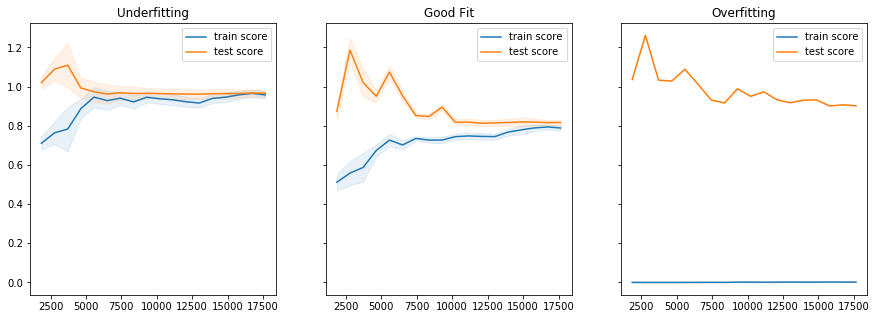

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), sharey=True)
train_sizes = np.arange(0.10, 1.00, 0.05) 

# Underfitting
ax1.set_title("Underfitting")
plot_learning_curve(DecisionTreeRegressor(max_depth=1), X, y, ax=ax1, 
                    scoring=rmse_scorer, train_sizes=train_sizes, cv=10)

# Good fit
ax2.set_title("Good Fit")
plot_learning_curve(DecisionTreeRegressor(max_depth=3), X, y, ax=ax2, 
                    scoring=rmse_scorer, train_sizes=train_sizes, cv=10)

# Overfitting
ax3.set_title("Overfitting")
plot_learning_curve(DecisionTreeRegressor(max_depth=30), X, y, ax=ax3, 
                    scoring=rmse_scorer, train_sizes=train_sizes, cv=10)

plt.show()